#                                                 Exploratory Data Analysis and Visualization using Order and SKU Data

### By: Parvaneh Jahani

## **Content:**

1. [Data Exploratory](#1)

    1. [Import order file](#41)
    
    1. [Revising the columns' names](#2)

    1. [Head of DataFrame](#3)

    1. [DataFrame Information](#4)

    1. [DataFrame Description](#5)

    1. [Correlation matrix](#6)

    1. [Correlation matrix](#7)

    1. [Cluster map](#8)

    1. [Plot target columns](#9)
    
    1. [jointplot for paid for order and Tax amount](#46)

1. [Summaries](#11)

    1. [Reduce size of DataFrame](#10)

    1. [SKU Summary](#12)

    1. [Order Summary By Date](#13)

    1. [Bar chart for orders per week](#14)

    1. [Find Peak Day](#15)
    
    1. [Unique SKUs per Week](#47)

    1. [Location Summary](#16)

    1. [Histogram of orders by location (state)](#17)
    
    1. [Order/SKUs distribution in geographical map](#28)

    1. [Order Summary](#18)

1. [Pareto Diagrams](#19)

    1. [Pareto diagram for Lines](#20)

    1. [Pareto diagram for quantity](#21)

1. [Single-Multi order analysis](#22)

    1. [Number of single-multi orders](#23)

    1. [Count of single multi lines](#24)

    1. [Order Summary by date for Single-Single](#25)

    1. [Order Summary by date for Single-Multi](#26)

    1. [Order Summary by date for Multi-Multi](#27)

**************************************************************
1. [SKU Profile](#29)

    1. [Revising the columns' names](#30)

    1. [Head of DataFrame](#31)

    1. [DataFrame Information](#32)

    1. [DataFrame Description](#33)

    1. [Reduce size of DataFrame](#34)

    1. [Box plot for items' dimensions](#35)

1. [Merge SKU profile and order data](#36)

1. [Summaries](#37)

    1. [Summary of Peak Day](#38)

    1. [Number of lines per Department](#39)

    1. [Number of lines Per Brand](#40)
    
    1. [barplot for qty per single-multi](#42)
    
    1. [boxplot for qty per single-multi](#43)
    
    1. [distplot for AVG Cost](#44)
    
    1. [Violinplot for AVG Cost per Single-Multi](#45)
    
    


<a id="1"></a> <br>
# Data Exploratory
Exploratory data analysis (EDA) is an important pillar of data science, a critical step required to complete most projects. It gives OSD analysts a sense of what additional analysis should be performed to extract more insights from projects’ data, compared to delivering the basic summary statistics. It also informs analysts as to what the deliverables of our analytical process should be. Data analysts can refer to this file to find any type of analysis that they need for their target project and it saves a lot of time of search for finding the corresponding codes and visualization techniques. EDA is a standard data analysis platform and an open-ended process where we calculate statistics and make figures to find trends, anomalies, patterns, or relationships within the data. The goal of EDA is to learn more about what our order and sku data can tell us. It generally starts out with a high level overview of the data set, then narrows in to specific summaries, trends, and distributions, along with visualization to promote communication with our customers. The findings may be used by OSD consultants, or they can be applied to support analysts in their modeling choices, such as feature engineering and per-processing steps in predictive model development.
## Libraries
Four main libraries are as follow: 

* Pandas DataFrames are the workhorse of pandas. Pandas is an open source library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language.
* NumPy is the fundamental package for scientific computing with Python. It contains among other things:
  * a powerful N-dimensional array object
  * sophisticated (broadcasting) functions
  * useful linear algebra, Fourier transform, and random number capabilities
* Matplot is a python library that help us to plot data. The easiest and basic plots are line, scatter and histogram plots.

   * Line plot is better when x axis is time.
   * Scatter is better when there is correlation between two variables
   * Histogram is better when we need to see distribution of numerical data.
   * Customization: Colors,labels,thickness of line, title, opacity, grid, figsize, ticks of axis and linestyle
* pylab is a module that gets installed alongside matplotlib. The pyplot interface is generally preferred for non-interactive plotting (i.e., scripting). The pylab interface is convenient for interactive calculations and plotting, as it minimizes typing. 


In [1]:
%matplotlib inline
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra
import os
import glob
from matplotlib import pyplot as plt
from pylab import figure, axes, pie, title, show
import pylab
import import_ipynb
import matplotlib.pyplot as plt
import seaborn as sns  # visualization tool
from matplotlib import pyplot
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import warnings
warnings.filterwarnings("ignore")
import plotly.graph_objs as go 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True) # set up everything so that the figures show up in the notebook:

<a id="41"></a> <br>
# Import order file

In [2]:
fullFrame = pd.read_csv('C:/Users/Parvaneh.Jahani/Desktop/Spencer/OrderData.txt', sep="|", error_bad_lines=False, encoding = "ISO-8859-1")
data = pd.DataFrame(fullFrame)

<a id="2"></a> <br>
# Revising the columns' names
To make sure that all columns' names are referable, .replace() method allows you to replace non-conforming characters, such as #/.-(), with under line.  

In [3]:
cols = data.columns
cols = cols.map(lambda x: x.replace(' ', '_'))
data.columns = cols

cols = data.columns
cols = cols.map(lambda x: x.replace('-', '_'))
data.columns = cols

cols = data.columns
cols = cols.map(lambda x: x.replace('.', '_'))
data.columns = cols

cols = data.columns
cols = cols.map(lambda x: x.replace('#', '_'))
data.columns = cols

cols = data.columns
cols = cols.map(lambda x: x.replace('/', '_'))
data.columns = cols

cols = data.columns
cols = cols.map(lambda x: x.replace('(', '_'))
data.columns = cols

cols = data.columns
cols = cols.map(lambda x: x.replace(')', '_'))
data.columns = cols
data.columns

Index(['Last_Name', 'First_Name', 'City', 'State', 'Zip', 'Cntry',
       'Order_Number', 'Order_Date', 'Trunc__Date',
       'Total_Amount_Paid_For_Order', 'Tax_Amount', 'Shipping_Amount',
       'Discount_Amount', 'Total_Amount_Paid_for_Products',
       'Product_SKU_Number', 'Number_of_Items_Purchased',
       'Unit_Price__for_item_'],
      dtype='object')

<a id="3"></a> <br>
# Head of DataFrame
DataFrame.head() function returns the first n rows for the object based on position. It is useful for quickly testing if your object has the right type of data in it.

In [4]:
data.head()

,Last_Name,First_Name,City,State,Zip,Cntry,Order_Number,Order_Date,Trunc__Date,Total_Amount_Paid_For_Order,Tax_Amount,Shipping_Amount,Discount_Amount,Total_Amount_Paid_for_Products,Product_SKU_Number,Number_of_Items_Purchased,Unit_Price__for_item_
0,Pare,Jennifer,Denver,CO,80238,US,502371350,2018-09-13 19:40:00,2018-09-13,896.02,39.87,4.99,0.80,997.50,132324,250,3.99
1,Scannell,Monica,Malvern,PA,19355,US,502101444,2018-02-22 17:14:40,2018-02-22,241.57,242.78,0.00,1345.25,4998.00,7265432,200,24.99
2,Hughes,Tony,Marietta,GA,30066,US,502194695,2018-06-14 10:09:44,2018-06-14,903.32,51.13,0.00,531.83,1384.02,1279496,198,6.99
3,Flamm,Jared,Encino,CA,91436,US,502247560,2018-07-24 18:11:25,2018-07-24,5096.13,442.13,0.00,0.00,1718.28,1109818,172,9.99
4,Scannell,Monica,Malvern,PA,19355,US,502101444,2018-02-22 17:14:40,2018-02-22,241.57,242.78,0.00,1345.25,1668.33,7313216,167,9.99


<a id="4"></a> <br>
# DataFrame Information
Pandas dataframe.info() function is used to get a concise summary of the dataframe. It comes really handy when doing exploratory analysis of the data. To get a quick overview of the dataset we use the dataframe.info() function.

### MISSING DATA and TESTING WITH ASSERT
If we encounter with missing data, what we can do:
* leave as is
* drop them with dropna()
* fill missing value with fillna()
* fill missing values with test statistics like mean
<br>Assert statement: check that you can turn on or turn off when you are done with your testing of the program

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1641261 entries, 0 to 1641260
Data columns (total 17 columns):
Last_Name                         1641241 non-null object
First_Name                        1641259 non-null object
City                              1641261 non-null object
State                             1641258 non-null object
Zip                               1641261 non-null object
Cntry                             1641261 non-null object
Order_Number                      1641261 non-null int64
Order_Date                        1641261 non-null object
Trunc__Date                       1641261 non-null object
Total_Amount_Paid_For_Order       1611974 non-null float64
Tax_Amount                        1641261 non-null float64
Shipping_Amount                   1641261 non-null float64
Discount_Amount                   1641261 non-null float64
Total_Amount_Paid_for_Products    1641261 non-null float64
Product_SKU_Number                1641261 non-null int64
Number_of_Item

<a id="5"></a> <br>
# DataFrame Description

DataFrame.describe() enerates descriptive statistics that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values. It analyzes both numeric and object series, as well as DataFrame column sets of mixed data types. The output will vary depending on what is provided. Refer to the notes below for more detail.
<br>outliers: the value that is considerably higher or lower from rest of the data
* Lets say value at 75% is Q3 and value at 25% is Q1. 
* Outlier are smaller than Q1 - 1.5(Q3-Q1) and bigger than Q3 + 1.5(Q3-Q1). (Q3-Q1) = IQR
<br>We will use describe() method. Describe method includes:
* count: number of entries
* mean: average of entries
* std: standart deviation
* min: minimum entry
* 25%: first quantile
* 50%: median or second quantile
* 75%: third quantile
* max: maximum entry

<br> What is quantile?

* 1,4,5,6,8,9,11,12,13,14,15,16,17
* The median is the number that is in **middle** of the sequence. In this case it would be 11.

* The lower quartile is the median in between the smallest number and the median i.e. in between 1 and 11, which is 6.
* The upper quartile, you find the median between the median and the largest number i.e. between 11 and 17, which will be 14 according to the question above.

In [6]:
data.describe()

,Order_Number,Total_Amount_Paid_For_Order,Tax_Amount,Shipping_Amount,Discount_Amount,Total_Amount_Paid_for_Products,Product_SKU_Number,Number_of_Items_Purchased,Unit_Price__for_item_
count,1.641261e+06,1.611974e+06,1.641261e+06,1.641261e+06,1.641261e+06,1.641261e+06,1.641261e+06,1.641261e+06,1.641261e+06
mean,5.025120e+08,8.136983e+01,4.491509e+00,8.330366e+00,7.666995e+00,2.817888e+01,3.219389e+06,1.092874e+00,2.687138e+01
std,2.542304e+05,1.230541e+02,7.912338e+00,1.238391e+01,1.326985e+01,3.331743e+01,2.482874e+06,1.014814e+00,2.671818e+01
min,5.020804e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.076900e+04,1.000000e+00,0.000000e+00
25%,5.022925e+08,3.682000e+01,1.710000e+00,4.990000e+00,0.000000e+00,1.000000e+01,1.365063e+06,1.000000e+00,9.990000e+00
50%,5.025023e+08,5.624000e+01,3.020000e+00,6.990000e+00,3.750000e+00,1.999000e+01,2.247716e+06,1.000000e+00,1.999000e+01
75%,5.027343e+08,9.206000e+01,5.260000e+00,9.990000e+00,1.000000e+01,3.699000e+01,3.397247e+06,1.000000e+00,3.699000e+01
max,5.029508e+08,1.599661e+04,8.887000e+02,9.996900e+02,1.345250e+03,1.421900e+04,8.188856e+06,2.970000e+02,8.999900e+02


<a id="6"></a> <br>
# Correlation matrix
DataFrame.corr()Computes pairwise correlation of columns, excluding NA/null values.

In [7]:
data.corr()

,Order_Number,Total_Amount_Paid_For_Order,Tax_Amount,Shipping_Amount,Discount_Amount,Total_Amount_Paid_for_Products,Product_SKU_Number,Number_of_Items_Purchased,Unit_Price__for_item_
Order_Number,1.000000,-0.035743,-0.040267,0.019548,0.069991,-0.004378,-0.039776,-0.005259,-0.000097
Total_Amount_Paid_For_Order,-0.035743,1.000000,0.676289,0.440773,0.235141,0.330306,-0.024403,0.169641,0.245015
Tax_Amount,-0.040267,0.676289,1.000000,0.608828,0.285600,0.307311,-0.024984,0.177526,0.215470
Shipping_Amount,0.019548,0.440773,0.608828,1.000000,0.049517,0.190827,-0.028145,0.054063,0.191586
Discount_Amount,0.069991,0.235141,0.285600,0.049517,1.000000,0.162266,-0.005882,0.154022,0.066702
Total_Amount_Paid_for_Products,-0.004378,0.330306,0.307311,0.190827,0.162266,1.000000,0.049844,0.339968,0.807162
Product_SKU_Number,-0.039776,-0.024403,-0.024984,-0.028145,-0.005882,0.049844,1.000000,-0.012722,0.064558
Number_of_Items_Purchased,-0.005259,0.169641,0.177526,0.054063,0.154022,0.339968,-0.012722,1.000000,-0.043861
Unit_Price__for_item_,-0.000097,0.245015,0.215470,0.191586,0.066702,0.807162,0.064558,-0.043861,1.000000


<a id="7"></a> <br>
# Correlation map
seaborn.heatmap() plots rectangular data as a color-encoded matrix. This is an Axes-level function and will draw the heatmap into the currently-active Axes if none is provided to the ax argument. Part of this Axes space will be taken and used to plot a colormap, unless cbar is False or a separate Axes is provided to cbar_ax.

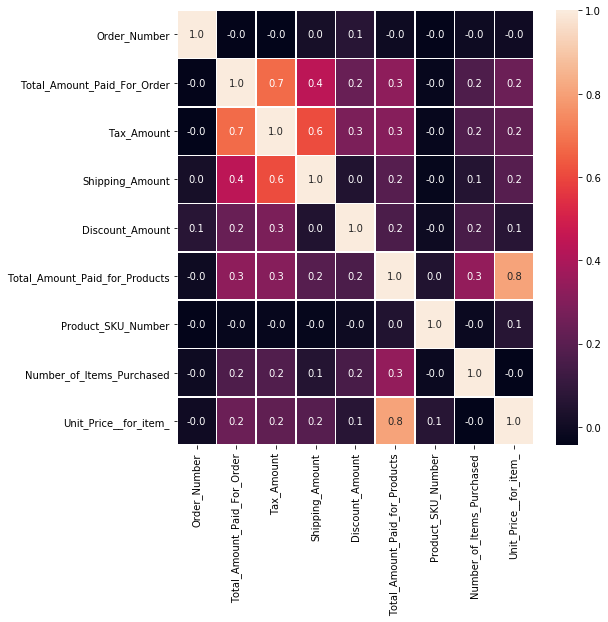

In [8]:
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(data.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

<a id="8"></a> <br>
# Cluster map
seaborn.clustermap() Plots a matrix dataset as a hierarchically-clustered heatmap. It allows you to visualise the structure of your entities (dendrogram), and to understand if this structure is logical (heatmap).

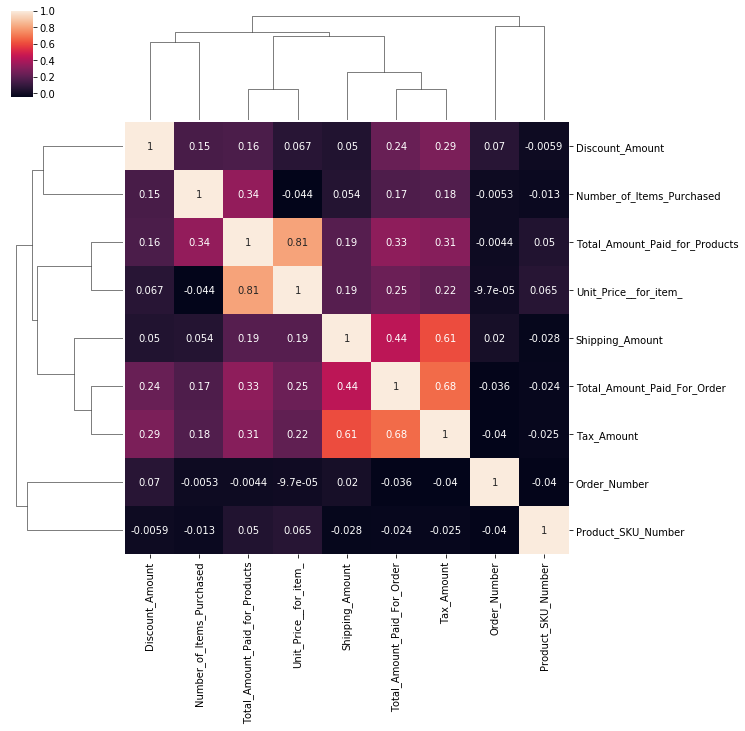

In [9]:
sns.clustermap(data.corr(), annot=True)
plt.show()

<a id="9"></a> <br>
### Plot target columns
Matplot is a python library that help us to plot data. The easiest and basic plots are line, scatter and histogram plots.
* Line plot is better when x axis is time.
* Scatter is better when there is correlation between two variables
* Histogram is better when we need to see distribution of numerical data.
* Customization: Colors,labels,thickness of line, title, opacity, grid, figsize, ticks of axis and linestyle  

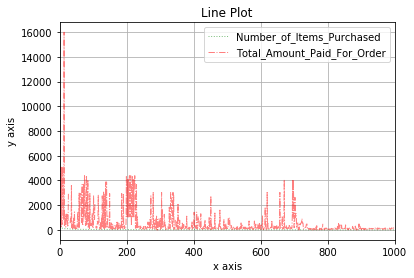

In [10]:
# Line Plot
# color = color, label = label, linewidth = width of line, alpha = opacity, grid = grid, linestyle = sytle of line
data.head(1000).Number_of_Items_Purchased.plot(kind = 'line', color = 'g',label = 'Number_of_Items_Purchased',linewidth=1,alpha = 0.5,grid = True,linestyle = ':')
data.head(1000).Total_Amount_Paid_For_Order.plot(color = 'r',label = 'Total_Amount_Paid_For_Order',linewidth=1, alpha = 0.5,grid = True,linestyle = '-.')
plt.legend(loc='upper right')     # legend = puts label into plot
plt.xlabel('x axis')              # label = name of label
plt.ylabel('y axis')
plt.title('Line Plot')            # title = title of plot
plt.show()

# jointplot for paid for order and Tax amount
<a id="46"></a> <br>
jointplot() allows us to basically match up two distplots for bivariate data. With your choice of what **kind** parameter to compare with: 
* “scatter” 
* “reg” 
* “resid” 
* “kde” 
* “hex”

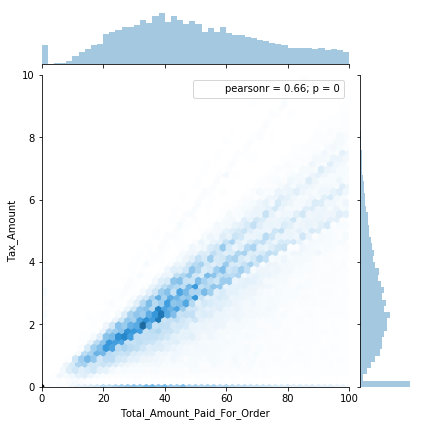

In [11]:
# dataCopy = data.copy()
# dataCopy = dataCopy.dropna()
# sns.distplot(dataCopy['Total_Amount_Paid_For_Order'],kde=False)

dataPaidLe100 = data[data['Total_Amount_Paid_For_Order'] <= 100] # Removing outliers
dataPaidLe100 = dataPaidLe100[dataPaidLe100['Tax_Amount'] <= 10] # Removing outliers
sns.jointplot(x='Total_Amount_Paid_For_Order',y='Tax_Amount', extent=[0,100,0,10], data=dataPaidLe100,kind='hex')

<a id="11"></a> <br>
# Summaries

<a id="10"></a> <br>
# Reduce size of DataFrame
First, we examine the columns in our data and make sure their labels intuitively convey what they represent. You can selects the required order data columns to reduce its size and then change the columns' names for convenience.

In [12]:
df = pd.DataFrame({'SKUIDs': data.Product_SKU_Number, 'QTY': data.Number_of_Items_Purchased, 'DAY': data.Trunc__Date, 'orNo': data.Order_Number, 'LOC':data.State})
df['DAY'] = df['DAY'].astype("datetime64")
df.head()

,DAY,LOC,QTY,SKUIDs,orNo
0,2018-09-13,CO,250,132324,502371350
1,2018-02-22,PA,200,7265432,502101444
2,2018-06-14,GA,198,1279496,502194695
3,2018-07-24,CA,172,1109818,502247560
4,2018-02-22,PA,167,7313216,502101444


<a id="12"></a> <br>
# SKU Summary

In [13]:
bySKU = pd.DataFrame(df.groupby(['SKUIDs'])['orNo'].count())
bySKU = bySKU.rename(columns={'orNo':'Lines'})
bySKU['QTYs'] = df.groupby(['SKUIDs'])['QTY'].sum()
# Find |daysHit|********************************************************************************************************
bySKU['DaysHit'] = df.groupby(['SKUIDs'])['DAY'].nunique()
# Find |orders|********************************************************************************************************
bySKU['Orders'] = df.groupby(['SKUIDs'])['orNo'].nunique()
bySKU.head(10)

,Lines,QTYs,DaysHit,Orders
SKUIDs,,,,
10769,151,165,73,151
11627,112,212,81,112
12468,45,51,28,45
16964,41,41,24,41
16972,11,11,10,11
16980,41,41,25,41
17012,13,13,10,13
17913,1,1,1,1
17921,7,18,7,7


<a id="13"></a> <br>
# Order Summary by Date

In [14]:
byDate = pd.DataFrame(df.groupby(['DAY'])['orNo'].nunique())
byDate.columns = ['TotalOrders']
byDate['TotalSKUs'] = df.groupby(['DAY'])['SKUIDs'].nunique()
byDate['TotalLines'] = df.groupby(['DAY'])['orNo'].size()
byDate['TotalQTY'] = df.groupby(['DAY'])['QTY'].sum()
byDate.head(10)

,TotalOrders,TotalSKUs,TotalLines,TotalQTY
DAY,,,,
2018-02-04,1071,1492,2195,2314
2018-02-05,1203,1752,2673,2871
2018-02-06,1146,1479,2211,2479
2018-02-07,1290,1708,2645,2821
2018-02-08,1116,1553,2350,2500
2018-02-09,1121,1631,2358,2608
2018-02-10,1036,1479,2124,2264
2018-02-11,1334,1844,2818,3001
2018-02-12,1210,1817,2600,2839


<a id="14"></a> <br>
# Bar chart for orders per week

Text(0, 0.5, 'Total orders')

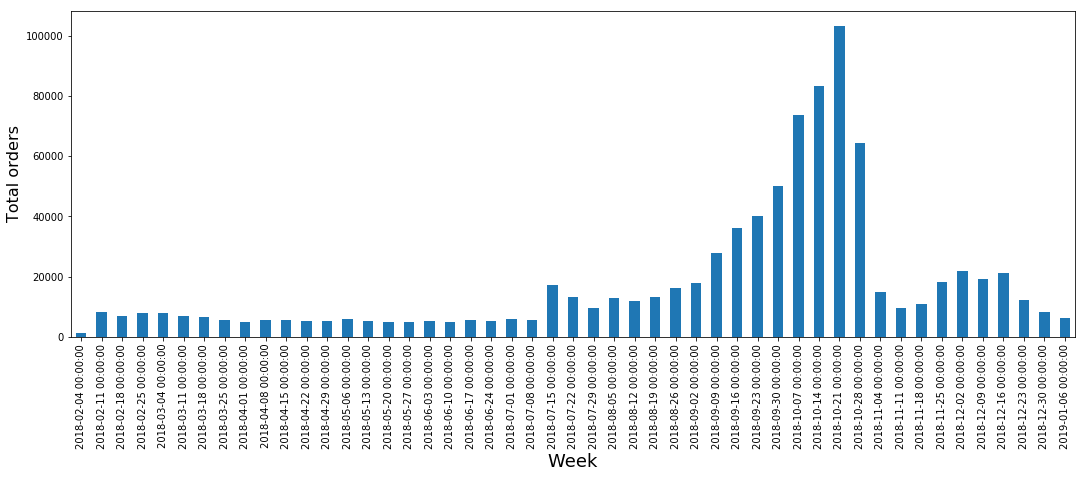

In [15]:
byDate.reset_index(level=0, inplace=True)
dfBarByWeek = byDate.groupby([pd.Grouper(freq='1W',key='DAY')])['TotalOrders'].sum()
dfBarByWeek.plot(kind = "bar",y = "TotalOrders", figsize = (18,6))
plt.xlabel('Week', fontsize=18)
plt.ylabel('Total orders', fontsize=16)

<a id="15"></a> <br>
# Find Peak Day

In [16]:
dfBarByDay = byDate.groupby([pd.Grouper(freq='1D',key='DAY')])['TotalOrders'].sum()
maxOrders = byDate.groupby([pd.Grouper(freq='1D',key='DAY')])['TotalOrders'].sum().max()
PeakDay = dfBarByDay[np.where(dfBarByDay == maxOrders)[0]]
PeakDay

DAY
2018-10-21    17293
Name: TotalOrders, dtype: int64

<a id="47"></a> <br>
# Unique SKUs per week

Text(0, 0.5, 'Count')

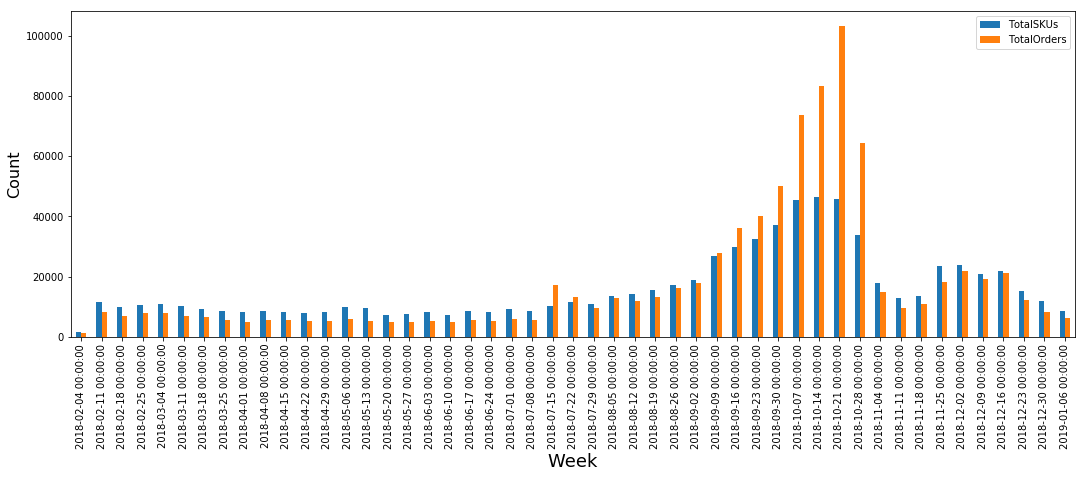

In [17]:
dfOrderSKU = pd.DataFrame()
dfOrderSKU['TotalOrders'] = byDate.groupby([pd.Grouper(freq='1W',key='DAY')])['TotalOrders'].sum()
dfOrderSKU['TotalSKUs'] = byDate.groupby([pd.Grouper(freq='1W',key='DAY')])['TotalSKUs'].sum()
dfOrderSKU.plot(kind = "bar",y = ["TotalSKUs",'TotalOrders'], figsize = (18,6))
plt.xlabel('Week', fontsize=18)
plt.ylabel('Count', fontsize=16)

<a id="16"></a> <br>
# Location Summary

In [18]:
byLoc = pd.DataFrame(df.groupby(['LOC'])['orNo'].nunique())
byLoc.columns = ['TotalOrders']
byLoc['TotalSKUs'] = df.groupby(['LOC'])['SKUIDs'].nunique()
byLoc['TotalLines'] = df.groupby(['LOC'])['orNo'].size()
byLoc['TotalQTY'] = df.groupby(['LOC'])['QTY'].sum()
byLoc.head(15)

,TotalOrders,TotalSKUs,TotalLines,TotalQTY
LOC,,,,
-,1,1,1,1
AA,12,34,35,40
AB,2767,4036,5924,6509
AE,226,451,520,546
AK,1418,2447,3344,3574
AL,9728,8724,18329,19888
AP,294,603,670,710
AR,5363,5745,10085,10750
AS,6,10,10,10


<a id="17"></a> <br>
# Histogram of orders by location (state)

Text(0, 0.5, 'Total orders')

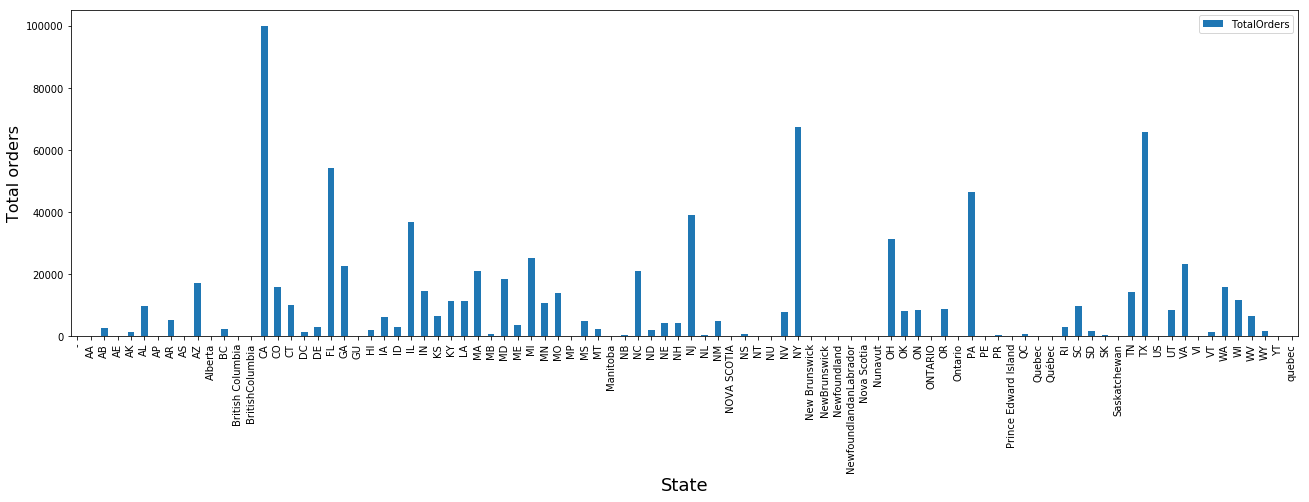

In [19]:
# byLoc.plot(kind = "hist",y = "TotalOrders")
byLoc.plot(kind = "bar",y = "TotalOrders", figsize = (22,6))
plt.xlabel('State', fontsize=18)
plt.ylabel('Total orders', fontsize=16)

In [20]:
ind = byLoc.index
byLocTN = byLoc[ind.str.contains('TN', regex=False)]
byLocTN.head(10)

,TotalOrders,TotalSKUs,TotalLines,TotalQTY
LOC,,,,
TN,14252,10694,26850,29021


<a id="28"></a> <br>
## Order/SKUs distribution in geographical map
We need Latitude and Longitude data for USA states:

In [21]:
statelatlong = pd.read_csv('C:/Users/Parvaneh.Jahani/Desktop/Spencer/statelatlong.csv')
latLong = pd.DataFrame(statelatlong)
latLong.head(5)

,State,Latitude,Longitude,City
0,AL,32.601011,-86.680736,Alabama
1,AK,61.302501,-158.775020,Alaska
2,AZ,34.168219,-111.930907,Arizona
3,AR,34.751928,-92.131378,Arkansas
4,CA,37.271875,-119.270415,California


We merge the Latitude and Longitude data with our byLoc dataFrame:

In [22]:
byLoc['State'] = byLoc.index
mergedLatByLoc = pd.merge(latLong, byLoc, on='State', how='inner')
mergedLatByLoc.head(5)

,State,Latitude,Longitude,City,TotalOrders,TotalSKUs,TotalLines,TotalQTY
0,AL,32.601011,-86.680736,Alabama,9728,8724,18329,19888
1,AK,61.302501,-158.775020,Alaska,1418,2447,3344,3574
2,AZ,34.168219,-111.930907,Arizona,17318,12342,32959,36465
3,AR,34.751928,-92.131378,Arkansas,5363,5745,10085,10750
4,CA,37.271875,-119.270415,California,100064,25246,187782,208733


## Choropleth USA Maps for total order

In [23]:
data = dict(type = 'choropleth',
            locations = mergedLatByLoc.State,
            locationmode = 'USA-states',
            colorscale= 'Portland',
            text= ['text1','text2','text3'],
            z=mergedLatByLoc.TotalOrders,
            colorbar = {'title':'Total Orders'})
layout = dict(geo = {'scope':'usa'})
choromap = go.Figure(data = [data],layout = layout)
iplot(choromap)

## Choropleth USA Maps for total SKUs

In [24]:
data = dict(type = 'choropleth',
            locations = mergedLatByLoc.State,
            locationmode = 'USA-states',
            colorscale= 'Portland',
            text= ['text1','text2','text3'],
            z=mergedLatByLoc.TotalSKUs,
            colorbar = {'title':'Total SKUs'})
layout = dict(geo = {'scope':'usa'})
choromap = go.Figure(data = [data],layout = layout)
iplot(choromap)

<a id="18"></a> <br>
# Order Summary

In [25]:
byOrder = pd.DataFrame(df.groupby(['orNo'])['orNo'].nunique())
byOrder.columns = ['TotalOrders']
byOrder['TotalSKUs'] = df.groupby(['orNo'])['SKUIDs'].nunique()
byOrder['TotalLines'] = df.groupby(['orNo'])['orNo'].size()
byOrder['TotalQTY'] = df.groupby(['orNo'])['QTY'].sum()
byOrder.head(10)

,TotalOrders,TotalSKUs,TotalLines,TotalQTY
orNo,,,,
502080437,1,2,2,2
502081035,1,4,4,4
502081039,1,4,4,4
502081061,1,1,1,1
502081062,1,1,1,1
502081105,1,1,1,1
502081131,1,4,4,4
502081156,1,2,2,2
502081158,1,3,3,4


<a id="19"></a> <br>
# Pareto Diagrams

<a id="20"></a> <br>
## Pareto diagram for Lines

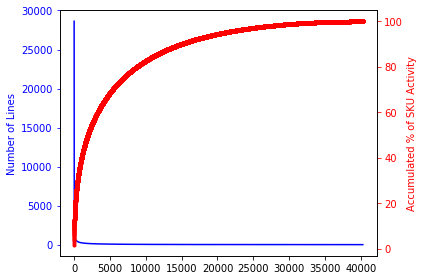

In [26]:
plotDFLines = pd.DataFrame(bySKU.Lines.values,columns=['L'])
plotDFLines = plotDFLines.sort_values(['L'], ascending=[False])
# Accumulative % of SKU activity
sumLines = sum(bySKU.Lines.values)

percentLine = []
for i in range(0, len(bySKU.index)):
    percentLine.append(plotDFLines.values[i]/sumLines*100)

cumSumPercentLine = np.cumsum(percentLine)

fig, ax1 = plt.subplots()
ax1.plot(plotDFLines.values, 'b-')
ax1.set_xlabel('')
# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel('Number of Lines', color='b')
ax1.tick_params('y', colors='b')

ax2 = ax1.twinx()
s2 = cumSumPercentLine
ax2.plot(s2, 'r.')
ax2.set_ylabel('Accumulated % of SKU Activity', color='r')
ax2.tick_params('y', colors='r')

fig.tight_layout()
# plt.show()
# pylab.savefig('C:/Users/Parvaneh.Jahani/Desktop/foo1.png')

<a id="21"></a> <br>
## Pareto diagram for quantity

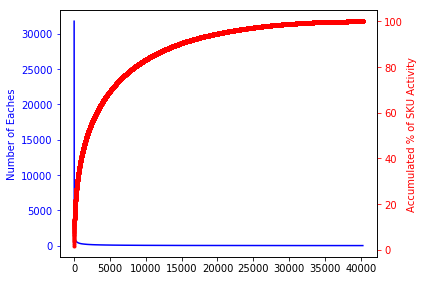

In [27]:
plotDFQTY = pd.DataFrame(bySKU.QTYs.values,columns=['Q'])
plotDFQTY = plotDFQTY.sort_values(['Q'], ascending=[False])
# Accumulative % of SKU activity
sumQTYs = sum(bySKU.QTYs.values)

percentQTY = []
for i in range(0, len(bySKU.index)):
    percentQTY.append(plotDFQTY.values[i]/sumQTYs*100)

cumSumPercentQTY = np.cumsum(percentQTY)

fig, ax3 = plt.subplots()
ax3.plot(plotDFQTY.values, 'b-')
ax3.set_xlabel('')
# Make the y-axis label, ticks and tick labels match the line color.
ax3.set_ylabel('Number of Eaches', color='b')
ax3.tick_params('y', colors='b')

ax4 = ax3.twinx()
s4 = cumSumPercentQTY
ax4.plot(s4, 'r.')
ax4.set_ylabel('Accumulated % of SKU Activity', color='r')
ax4.tick_params('y', colors='r')

fig.tight_layout()
# plt.show()
# pylab.savefig('C:/Users/Parvaneh.Jahani/Desktop/foo2.png')

<a id="22"></a> <br>
# Single-Multi order analysis

In [28]:
df['Lines'] = df.groupby('orNo')['orNo'].transform('count')
df['sumQTY'] = df.groupby('orNo')['QTY'].transform('sum')
conditions = [(df['Lines']>1)&(df['sumQTY']>1),
              (df['Lines']==1)&(df['sumQTY']==1),
              (df['Lines']==1)&(df['sumQTY']>1)]
choices = ['MM','SS','SM']
df['SingleMulti'] = np.select(conditions, choices, default='NOTFOUND')

dfSS = df[df['SingleMulti'] == 'SS']
dfSM = df[df['SingleMulti'] == 'SM']
dfMM = df[df['SingleMulti'] == 'MM']

<a id="23"></a> <br>
## Number of single-multi orders

In [29]:
arr = [['Single_Single',dfSS.orNo.nunique(),dfSS.SKUIDs.nunique(),dfSS.orNo.count(),dfSS.QTY.sum()],['Single_Multi',dfSM.orNo.nunique(),dfSM.SKUIDs.nunique(),dfSM.orNo.count(),dfSM.QTY.sum()],['Multi_Multi',dfMM.orNo.nunique(),dfMM.SKUIDs.nunique(),dfMM.orNo.count(),dfMM.QTY.sum()]]
dfSummary = pd.DataFrame(arr,columns=['Type','Number_of_orders','Number_of_orders','Number_of_lines','Quantities']).reset_index(drop=True)
dfSummary

,Type,Number_of_orders,Number_of_orders,Number_of_lines,Quantities
0,Single_Single,478013,28986,478013,478013
1,Single_Multi,22369,6356,22369,73476
2,Multi_Multi,363266,38807,1140879,1242203


<a id="24"></a> <br>
## Count of single multi lines

MM    1140879
SS     478013
SM      22369
Name: SingleMulti, dtype: int64

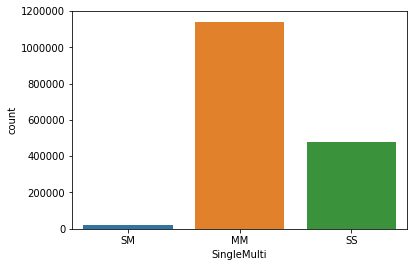

In [30]:
df['SingleMulti'].value_counts(dropna =False)
sns.countplot(x="SingleMulti", data=df)
df.loc[:,'SingleMulti'].value_counts()

<a id="25"></a> <br>
## Order Summary by date for Single-Single

In [31]:
byDate = pd.DataFrame(dfSS.groupby(['DAY'])['orNo'].nunique())
byDate.columns = ['TotalOrders']
byDate['TotalSKUs'] = dfSS.groupby(['DAY'])['SKUIDs'].nunique()
byDate['TotalLines'] = dfSS.groupby(['DAY'])['orNo'].size()
byDate['TotalQTY'] = dfSS.groupby(['DAY'])['QTY'].sum()
byDate.head(10)

,TotalOrders,TotalSKUs,TotalLines,TotalQTY
DAY,,,,
2018-02-04,490,422,490,490
2018-02-05,510,425,510,510
2018-02-06,571,489,571,571
2018-02-07,613,526,613,613
2018-02-08,499,420,499,499
2018-02-09,513,449,513,513
2018-02-10,487,432,487,487
2018-02-11,616,506,616,616
2018-02-12,591,488,591,591


<a id="26"></a> <br>
## Order Summary by date for Single-Multi

In [32]:
byDate = pd.DataFrame(dfSM.groupby(['DAY'])['orNo'].nunique())
byDate.columns = ['TotalOrders']
byDate['TotalSKUs'] = dfSM.groupby(['DAY'])['SKUIDs'].nunique()
byDate['TotalLines'] = dfSM.groupby(['DAY'])['orNo'].size()
byDate['TotalQTY'] = dfSM.groupby(['DAY'])['QTY'].sum()
byDate.head(10)

,TotalOrders,TotalSKUs,TotalLines,TotalQTY
DAY,,,,
2018-02-04,38,38,38,114
2018-02-05,20,19,20,95
2018-02-06,34,32,34,189
2018-02-07,41,39,41,144
2018-02-08,27,26,27,79
2018-02-09,27,26,27,117
2018-02-10,21,20,21,62
2018-02-11,30,30,30,89
2018-02-12,33,28,33,102


<a id="27"></a> <br>
## Order Summary by date for Multi-Multi

In [33]:
byDate = pd.DataFrame(dfMM.groupby(['DAY'])['orNo'].nunique())
byDate.columns = ['TotalOrders']
byDate['TotalSKUs'] = dfMM.groupby(['DAY'])['SKUIDs'].nunique()
byDate['TotalLines'] = dfMM.groupby(['DAY'])['orNo'].size()
byDate['TotalQTY'] = dfMM.groupby(['DAY'])['QTY'].sum()
byDate.head(10)

,TotalOrders,TotalSKUs,TotalLines,TotalQTY
DAY,,,,
2018-02-04,543,1152,1667,1710
2018-02-05,673,1443,2143,2266
2018-02-06,541,1105,1606,1719
2018-02-07,636,1321,1991,2064
2018-02-08,590,1235,1824,1922
2018-02-09,581,1292,1818,1978
2018-02-10,528,1138,1616,1715
2018-02-11,688,1481,2172,2296
2018-02-12,586,1458,1976,2146


<a id="29"></a> <br>
# SKU profile

In [34]:
skuProfile = pd.read_csv('C:/Users/Parvaneh.Jahani/Desktop/Spencer/SKUMaster.txt', sep="|", error_bad_lines=False, encoding = "ISO-8859-1")
SKUData = pd.DataFrame(skuProfile)

<a id="30"></a> <br>
# Revising the columns' names
To make sure that all columns' names are referable, .replace() method allows you to replace non-conforming characters, such as #/.-(), with under line.

In [35]:
cols = SKUData.columns
cols = cols.map(lambda x: x.replace(' ', '_'))
SKUData.columns = cols

cols = SKUData.columns
cols = cols.map(lambda x: x.replace('-', '_'))
SKUData.columns = cols

cols = SKUData.columns
cols = cols.map(lambda x: x.replace('.', '_'))
SKUData.columns = cols

cols = SKUData.columns
cols = cols.map(lambda x: x.replace('#', '_'))
SKUData.columns = cols

cols = SKUData.columns
cols = cols.map(lambda x: x.replace('/', '_'))
SKUData.columns = cols

cols = SKUData.columns
cols = cols.map(lambda x: x.replace('(', '_'))
SKUData.columns = cols

cols = SKUData.columns
cols = cols.map(lambda x: x.replace(')', '_'))
SKUData.columns = cols
SKUData.columns

Index(['Lob', 'Lob_SKU_Concat', 'Sku', 'Description', 'Dept_ID', 'Dept_Name',
       'Brand', 'Class_ID', 'Class_Name', 'UOM', 'Each_Case', 'Each_InrPk',
       'InrPk_Case', 'Shelf_Pack', 'Item_Hgt', 'Item_Lgh', 'Item_Wdh',
       'Inpk_Hgt', 'Inpk_Lgh', 'Inpk_Wdh', 'Inpk_Wgt', 'Inpk_Cub', 'Mspk_Hgt',
       'Mspk_Lgh', 'Mspk_Wdh', 'Mspk_Wgt', 'Mspk_Cub', 'Prpk', 'BASERETL',
       'AVGCOST', 'Velocity'],
      dtype='object')

<a id="31"></a> <br>
# Head of DataFrame
DataFrame.head() function returns the first n rows for the object based on position. It is useful for quickly testing if your object has the right type of data in it.

In [36]:
SKUData.head()

,Lob,Lob_SKU_Concat,Sku,Description,Dept_ID,Dept_Name,Brand,Class_ID,Class_Name,UOM,Each_Case,Each_InrPk,InrPk_Case,Shelf_Pack,Item_Hgt,Item_Lgh,Item_Wdh,Inpk_Hgt,Inpk_Lgh,Inpk_Wdh,Inpk_Wgt,Inpk_Cub,Mspk_Hgt,Mspk_Lgh,Mspk_Wdh,Mspk_Wgt,Mspk_Cub,Prpk,BASERETL,AVGCOST,Velocity
0,7,07-07069339,7069339,PERRY FACE FLATBILL LRG/XLRG,ZZZ,RETIRED,Spencers,MD1,RETIRED MERCH MANAGER 1,NaN,0,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.00,0.0,NaN
1,7,07-07069347,7069347,THING 1/2 FLATBILL MED/LRG,ZZZ,RETIRED,Spencers,MD1,RETIRED MERCH MANAGER 1,NaN,0,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,19.99,7.0,NaN
2,7,07-07069354,7069354,THING 1/2 FLATBILL LRG/XLRG,ZZZ,RETIRED,Spencers,MD1,RETIRED MERCH MANAGER 1,NaN,0,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,19.99,7.0,NaN
3,7,07-07069362,7069362,CAT IN THE HAT FB MED/LRG,ZZZ,RETIRED,Spencers,MD1,RETIRED MERCH MANAGER 1,NaN,0,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,19.99,7.0,NaN
4,7,07-07069370,7069370,CAT IN THE HAT FB LRG/XLRG,ZZZ,RETIRED,Spencers,MD1,RETIRED MERCH MANAGER 1,NaN,0,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,19.99,7.0,NaN


<a id="32"></a> <br>
# DataFrame Information
Pandas dataframe.info() function is used to get a concise summary of the dataframe. It comes really handy when doing exploratory analysis of the data. To get a quick overview of the dataset we use the dataframe.info() function.

### MISSING DATA and TESTING WITH ASSERT
If we encounter with missing data, what we can do:
* leave as is
* drop them with dropna()
* fill missing value with fillna()
* fill missing values with test statistics like mean
<br>Assert statement: check that you can turn on or turn off when you are done with your testing of the program

In [37]:
SKUData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211692 entries, 0 to 211691
Data columns (total 31 columns):
Lob               211692 non-null int64
Lob_SKU_Concat    211692 non-null object
Sku               211692 non-null int64
Description       211675 non-null object
Dept_ID           211675 non-null object
Dept_Name         211692 non-null object
Brand             211675 non-null object
Class_ID          211675 non-null object
Class_Name        211692 non-null object
UOM               202095 non-null object
Each_Case         211692 non-null int64
Each_InrPk        202095 non-null float64
InrPk_Case        202095 non-null float64
Shelf_Pack        211692 non-null int64
Item_Hgt          144727 non-null float64
Item_Lgh          144727 non-null float64
Item_Wdh          144727 non-null float64
Inpk_Hgt          206193 non-null float64
Inpk_Lgh          206193 non-null float64
Inpk_Wdh          206193 non-null float64
Inpk_Wgt          206196 non-null float64
Inpk_Cub          20580

<a id="33"></a> <br>
# DataFrame Description

DataFrame.describe() generates descriptive statistics that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values. It analyzes both numeric and object series, as well as DataFrame column sets of mixed data types. The output will vary depending on what is provided. Refer to the notes below for more detail.

* Lets say value at 75% is Q3 and value at 25% is Q1. 
* Outlier are smaller than Q1 - 1.5(Q3-Q1) and bigger than Q3 + 1.5(Q3-Q1). (Q3-Q1) = IQR

* count: number of entries
* mean: average of entries
* std: standart deviation
* min: minimum entry
* 25%: first quantile
* 50%: median or second quantile
* 75%: third quantile
* max: maximum entry

In [38]:
SKUData.describe()

,Lob,Sku,Each_Case,Each_InrPk,InrPk_Case,Shelf_Pack,Item_Hgt,Item_Lgh,Item_Wdh,Inpk_Hgt,Inpk_Lgh,Inpk_Wdh,Inpk_Wgt,Inpk_Cub,Mspk_Hgt,Mspk_Lgh,Mspk_Wdh,Mspk_Wgt,Mspk_Cub,BASERETL,AVGCOST
count,211692.0,2.116920e+05,211692.000000,202095.000000,202095.000000,211692.000000,144727.000000,144727.000000,144727.000000,206193.000000,206193.000000,206193.000000,206196.000000,205802.000000,206196.000000,206196.000000,206196.000000,206196.000000,211692.000000,211692.000000,211692.000000
mean,7.0,3.597583e+06,111.439299,1.567599,107.281427,1.475894,8.387156,2.106900,6.070971,0.170292,0.174727,0.168587,0.152191,0.101817,10.284811,11.943267,10.480966,20.848272,1.303481,16.596505,6.650548
std,0.0,2.298176e+06,256.217923,16.137099,248.684231,1.813487,6.433053,4.014332,6.714019,0.633415,0.581367,0.483816,0.422868,0.094964,10.648170,8.183243,6.886206,27.677720,2.628587,24.232524,11.621572
min,7.0,1.013200e+04,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.100000,0.000000,0.000000,0.000000,0.000000
25%,7.0,2.202024e+06,1.000000,1.000000,1.000000,1.000000,2.500000,0.100000,1.500000,0.100000,0.100000,0.100000,0.100000,0.100000,6.000000,7.900000,8.000000,5.000000,0.100000,0.010000,0.010000
50%,7.0,2.890743e+06,12.000000,1.000000,12.000000,1.000000,9.000000,1.000000,6.000000,0.100000,0.100000,0.100000,0.100000,0.100000,10.000000,10.000000,10.000000,10.000000,0.500000,12.980000,4.000000
75%,7.0,7.017298e+06,60.000000,1.000000,60.000000,1.000000,13.900000,1.600000,10.900000,0.100000,0.100000,0.100000,0.100000,0.100000,14.000000,17.700000,14.500000,26.000000,2.100000,21.990000,8.750000
max,7.0,8.188864e+06,30000.000000,6000.000000,999.000000,300.000000,288.000000,236.000000,1737.000000,187.500000,70.400000,32.000000,67.000000,35.200000,2420.000000,236.000000,187.500000,2029.000000,421.800000,1299.990000,713.330000


<a id="34"></a> <br>
# Reduce size of DataFrame
First, we examine the columns in our data and make sure their labels intuitively convey what they represent. You can selects the required order data columns to reduce its size and then change the columns' names for convenience.

In [39]:
SKUdf = pd.DataFrame({'SKUIDs': SKUData.Sku, 'Item_Hgt': SKUData.Item_Hgt,'Item_Lgh': SKUData.Item_Lgh,'Item_Wdh': SKUData.Item_Wdh,'Dept_Name': SKUData.Dept_Name,'Velocity': SKUData.Velocity,'AVGCOST': SKUData.AVGCOST, 'Brand': SKUData.Brand})
SKUdf.head()

,AVGCOST,Brand,Dept_Name,Item_Hgt,Item_Lgh,Item_Wdh,SKUIDs,Velocity
0,0.0,Spencers,RETIRED,NaN,NaN,NaN,7069339,NaN
1,7.0,Spencers,RETIRED,NaN,NaN,NaN,7069347,NaN
2,7.0,Spencers,RETIRED,NaN,NaN,NaN,7069354,NaN
3,7.0,Spencers,RETIRED,NaN,NaN,NaN,7069362,NaN
4,7.0,Spencers,RETIRED,NaN,NaN,NaN,7069370,NaN


<a id="35"></a> <br>
# Box plot for items' dimensions
* Box plots: visualize basic statistics like outliers, min/max or quantiles

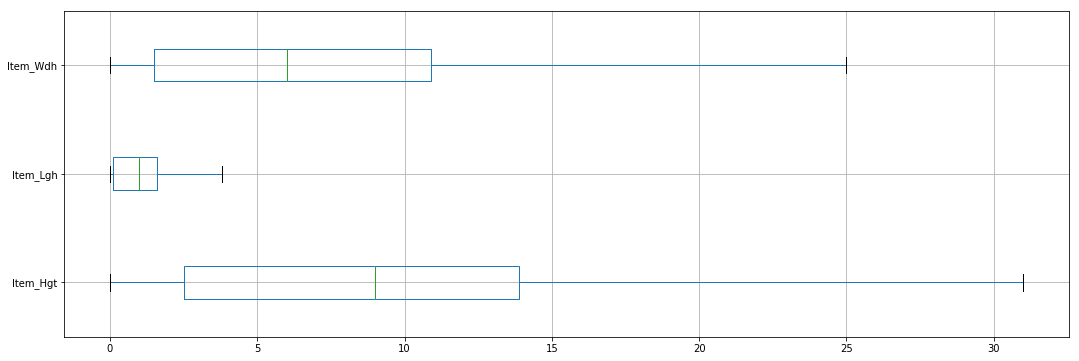

In [40]:
SKUdf.boxplot(column=['Item_Hgt', 'Item_Lgh', 'Item_Wdh'], vert=False, showfliers=False, figsize = (18,6))

<a id="36"></a> <br>
# Merge SKU profile and order data

In [41]:
mergedDF = pd.merge(df,SKUdf, on='SKUIDs', how='outer') 
mergedDF.head()

,DAY,LOC,QTY,SKUIDs,orNo,Lines,sumQTY,SingleMulti,AVGCOST,Brand,Dept_Name,Item_Hgt,Item_Lgh,Item_Wdh,Velocity
0,2018-09-13,CO,250.0,132324,502371350.0,1.0,250.0,SM,0.53,Spirit,ENTERTAINMENT ACCESSORIES,9.0,7.0,4.75,A+
1,2018-10-13,FL,4.0,132324,502613149.0,4.0,7.0,MM,0.53,Spirit,ENTERTAINMENT ACCESSORIES,9.0,7.0,4.75,A+
2,2018-09-12,PA,4.0,132324,502365087.0,6.0,9.0,MM,0.53,Spirit,ENTERTAINMENT ACCESSORIES,9.0,7.0,4.75,A+
3,2018-09-25,ON,2.0,132324,502438619.0,7.0,8.0,MM,0.53,Spirit,ENTERTAINMENT ACCESSORIES,9.0,7.0,4.75,A+
4,2018-09-25,WA,2.0,132324,502439782.0,3.0,4.0,MM,0.53,Spirit,ENTERTAINMENT ACCESSORIES,9.0,7.0,4.75,A+


<a id="37"></a> <br>
# Summaries

<a id="38"></a> <br>
# Summary of Peak Day

In [42]:
peakDF = mergedDF[mergedDF['DAY']== '2018-10-01']
peakDFbySKU = pd.DataFrame(peakDF.groupby(['SKUIDs'])['orNo'].nunique())
peakDFbySKU = peakDFbySKU.rename(columns={'OrNo':'Orders'})
peakDFbySKU['Quantity'] = peakDF.groupby(['SKUIDs'])['QTY'].sum()
peakDFbySKU['Hgt'] = peakDF.groupby(['SKUIDs'])['Item_Hgt'].mean()
peakDFbySKU['Lgh'] = peakDF.groupby(['SKUIDs'])['Item_Lgh'].mean()
peakDFbySKU['Wdh'] = peakDF.groupby(['SKUIDs'])['Item_Wdh'].mean()
# peakDFbySKU['CuFt'] = peakDFbySKU['Item_Hgt']
peakDFbySKU ['CuFt'] = peakDFbySKU['Hgt']*peakDFbySKU['Lgh']*peakDFbySKU['Wdh']*(1/12**3)
peakDFbySKU.head()

,orNo,Quantity,Hgt,Lgh,Wdh,CuFt
SKUIDs,,,,,,
10769,1,1.0,1.0,1.0,1.0,0.000579
11627,3,4.0,8.2,1.1,7.1,0.037061
12468,1,2.0,14.0,0.8,12.0,0.077778
16980,1,1.0,13.5,0.4,16.0,0.050000
23358,1,1.0,12.0,1.0,6.5,0.045139


<a id="39"></a> <br>
# Number of lines per Department

Top five Departments are:


ENTERTAINMENT ACCESSORIES    149971
INTIMATE TOYS                129316
CHILD MALE COSTUMES          124816
ADULT FEMALE COSTUMES        120854
IMPULSE                      106572
Name: Dept_Name, dtype: int64

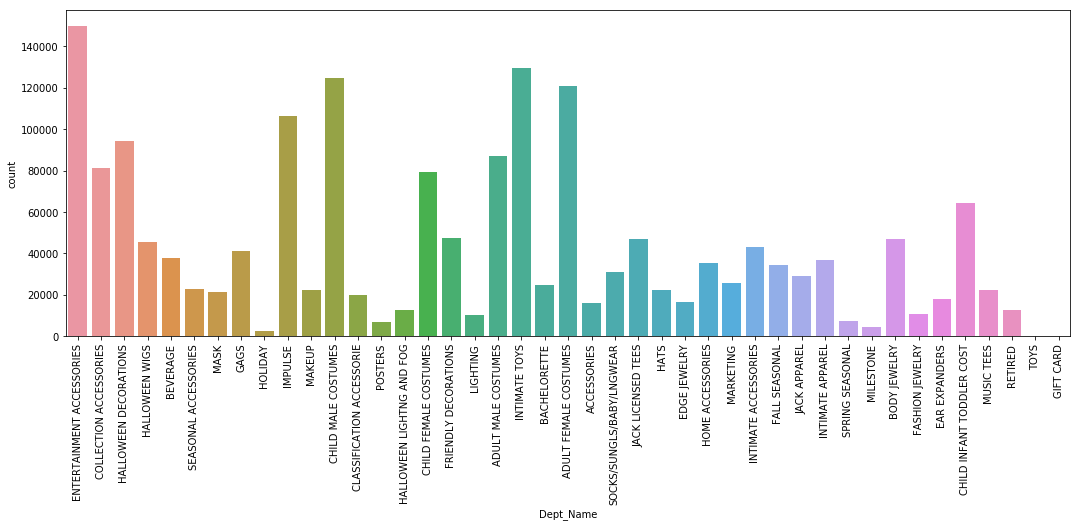

In [43]:
mergedDF['Dept_Name'].value_counts(dropna =False)
fig, ax = pyplot.subplots(figsize=(18,6))
sns.countplot(ax=ax, x="Dept_Name", data=mergedDF)
plt.xticks(rotation=90)
print("Top five Departments are:")
mergedDF.loc[:,'Dept_Name'].value_counts().nlargest(5)

<a id="40"></a> <br>
# Number of lines per Brand

Spirit      1069147
Spencers     743501
Name: Brand, dtype: int64

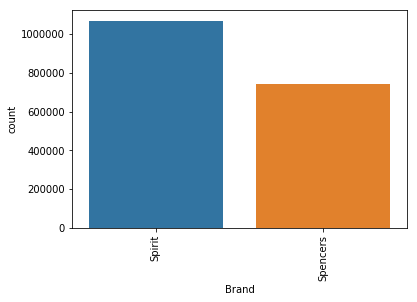

In [44]:
mergedDF['Brand'].value_counts(dropna =False)
sns.countplot(x="Brand", data=mergedDF)
plt.xticks(rotation=90)
mergedDF.loc[:,'Brand'].value_counts()

# barplot for qty per single-multi
<a id="42"></a> <br>
**barplot** is a general plot that allows us to aggregate the categorical data based off some function, by default the mean:

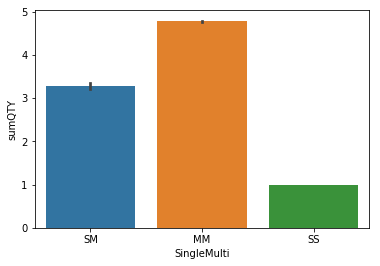

In [45]:
sns.barplot(x='SingleMulti',y='sumQTY',data=mergedDF)

# boxplot for qty per single-multi
<a id="43"></a> <br>
boxplots are used to shown the distribution of categorical data. A box plot (or box-and-whisker plot) shows the distribution of quantitative data in a way that facilitates comparisons between variables or across levels of a categorical variable. The box shows the quartiles of the dataset while the whiskers extend to show the rest of the distribution, except for points that are determined to be “outliers” using a method that is a function of the inter-quartile range.

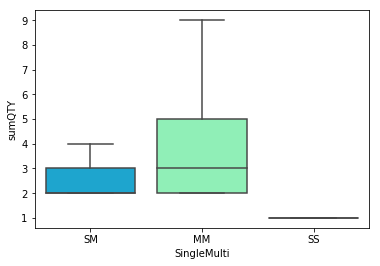

In [46]:
sns.boxplot(x="SingleMulti", y="sumQTY", data=mergedDF,palette='rainbow', showfliers=False)

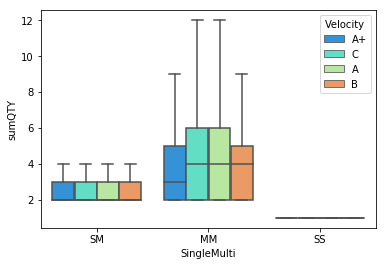

In [47]:
sns.boxplot(x="SingleMulti", y="sumQTY", hue = 'Velocity', data=mergedDF,palette='rainbow', showfliers=False)

# distplot for AVG Cost
<a id="44"></a> <br>
The distplot shows the distribution of a univariate set of observations.

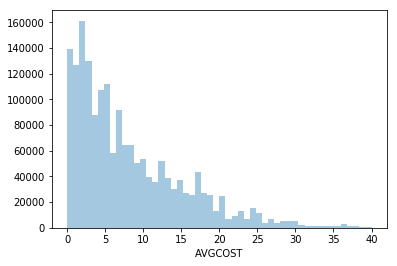

In [48]:
mergedDFAVGCOSTLe40 = mergedDF[mergedDF['AVGCOST'] <= 40] # Removing outliers
sns.distplot(mergedDFAVGCOSTLe40['AVGCOST'],kde=False)

# Violinplot for AVG Cost per Single-Multi
<a id="45"></a> <br>
A violin plot plays a similar role as a box and whisker plot. It shows the distribution of quantitative data across several levels of one (or more) categorical variables such that those distributions can be compared. Unlike a box plot, in which all of the plot components correspond to actual datapoints, the violin plot features a kernel density estimation of the underlying distribution.

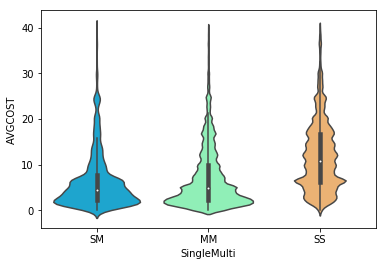

In [49]:
sns.violinplot(x="SingleMulti", y="AVGCOST", data=mergedDFAVGCOSTLe40,palette='rainbow')

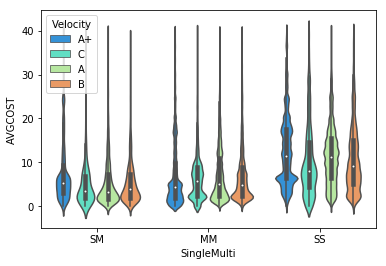

In [50]:
sns.violinplot(x="SingleMulti", y="AVGCOST", hue = 'Velocity', data=mergedDFAVGCOSTLe40,palette='rainbow')